***PHASE 2 PROJECT***

**INTRODUCTION**

We have been given a project of a real estate. In the project we are required use multiple linear regression modeling to analyze house sales in a northwestern county.

**THE BUSINESS PROBLEM / UNDERSTANDING**

The need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

**BUSINESS UNDERSTANDING**

OBJECTIVES

As a data scientist your job is to build multiple linear regression models that will predict the dependent variable which is the house sale price against the  various independent variable that we have been given in the dataset.

**SPECIFIC OBJECTIVES**

Which variables are affecting the housing prices? make sure to identify it.

Create models and evaluate how well the variables can/are predicting the house prices.

To create models with linear regression that relates house prices with the different variables.

**DATA UNDERSTANDING**

We have been provided with King County House Dataset which is found in a kc_house_data.csv and column names which are found in column names.md.The column names contains  certain data like :- date, price,	bedrooms, bathrooms,sqft_living, floors, waterfront, view, sqft_basement, yr_built, yr_renovated and the zipcode of the house. The data provided you will decide what variables to use against the target variable.

***KING COUNTY HOUSE SALES DATASET***

IMPORTING lIBRARIES

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

READING THE DATA IN THE DATABASE

In [2]:
# we are reading the data from the csv in order to know what is contained in the dataset
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
# Inspecting the data
#Reading the first 10 rows
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
#Reading the last 10 rows
df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,NONE,...,8 Good,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731
21588,9834201367,1/26/2015,429000.0,3,2.00,1490,1126,3.0,NO,NONE,...,8 Good,1490,0.0,2014,0.0,98144,47.5699,-122.288,1400,1230
21589,3448900210,10/14/2014,610685.0,4,2.50,2520,6023,2.0,NO,NaN,...,9 Better,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023
21590,7936000429,3/26/2015,1010000.0,4,3.50,3510,7200,2.0,NO,NONE,...,9 Better,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
#Checking each columns datatypes
#looking at the column and datatypes in kc_house_data using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#previewing the number of rows and columns in kc_house_data
df.shape

(21597, 21)

In [7]:
#The describe() function does a summary of statistics that has to do with the DataFrame.

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#The length of rows in the dataframe in the dataframe of kc_house_data

length_kc_house_data = len(df)

length_kc_house_data

21597

In [9]:
df['waterfront'].describe

<bound method NDFrame.describe of 0        NaN
1         NO
2         NO
3         NO
4         NO
        ... 
21592     NO
21593     NO
21594     NO
21595    NaN
21596     NO
Name: waterfront, Length: 21597, dtype: object>

In [10]:
df['yr_renovated'].describe

<bound method NDFrame.describe of 0           0.0
1        1991.0
2           NaN
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21597, dtype: float64>

CLEANING THE DATASET

In [11]:
#defining a function checking for number of duplicated rows
def lookfor_duplicates(df):
    duplicates = df.duplicated().sum()
    print (f"We have {duplicates} duplicated rows")

In [12]:
#using the function to call out for duplicates
lookfor_duplicates(df)

We have 0 duplicated rows


In [13]:
#Another way to also look for duplicates in the dataset. That way we will know what values have been repeated. 
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

False in the dataset means that there are no duplicates

CHECKING FOR MISSING DATA

In [14]:
#Checking for missing data
#True is equivalent to 1 and False is equivalent to 0, taking the .sum() will return the total number of NaN values
#in the dataset.That way you can decide whether to drop them or not.
#(.isnull().sum()  also gives the same answer)

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

*From the data shown above we can see that 'waterfront' and 'yr_renovation' have alot of missing values*

In [15]:
#returns object containing unique values. The first element is the most frequently-occurring element in the yr_renovated column.
df['yr_renovated'].value_counts

<bound method IndexOpsMixin.value_counts of 0           0.0
1        1991.0
2           NaN
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21597, dtype: float64>

We can see that most values that were keyed for the yr_renovated in are 0, which means we don't know if renovation was done or not.

In [16]:
#returns object containing unique values. The first element is the most frequently-occurring element in the waterfront column.
df['waterfront'].value_counts

<bound method IndexOpsMixin.value_counts of 0        NaN
1         NO
2         NO
3         NO
4         NO
        ... 
21592     NO
21593     NO
21594     NO
21595    NaN
21596     NO
Name: waterfront, Length: 21597, dtype: object>

We can see that  waterfront contains No and NaN. The NaN values will be treated as 0.

Creating a copy of the original dataset that way the original values are not tampered with and can still be reffered to or called out in the future

In [17]:
cleaned_df = df[['id', 'price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']].copy()
cleaned_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,1410,1287


In [18]:
# I have used .fillna in order to fill the NaN values with 0, so that we can balance the values in the 'waterfront' column
cleaned_df["waterfront"] = cleaned_df["waterfront"].fillna(0)
cleaned_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,1180,0.0,1955,0.0,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,NONE,Average,8 Good,1600,0.0,2004,0.0,1410,1287


From the table above i have used .fillna(). the missing values (nan) in waterfront have been filled with zero values. 

In [19]:
# I have used .fillna in order to fill the NaN values with 0, so that we can balance the values in the 'yr_renovated' column
cleaned_df["yr_renovated"] = cleaned_df["yr_renovated"].fillna(0)
cleaned_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,1180,0.0,1955,0.0,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,NONE,Average,8 Good,1600,0.0,2004,0.0,1410,1287


From the table above i have used .fillna(). the missing values (nan) in yr_renovated have been filled with zero values. 

In [20]:
#returns object containing unique values. The first element is the most frequently-occurring element in the view column
cleaned_df.view.value_counts()

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

from the value_counts we can see none, how the properties were rated and the number of people who rated it .

In [21]:
# df_clean['view'] = df_clean['view'].fillna(0)
cleaned_df.view.fillna(0.0, inplace=True)
cleaned_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,1180,0.0,1955,0.0,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,NONE,Average,8 Good,1600,0.0,2004,0.0,1410,1287


In [22]:
# checking if the NaN has been converted to 0
cleaned_df.view.value_counts(dropna=False)

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
0.0             63
Name: count, dtype: int64

we can see that the nan has been filled with 0. This can be plotted effectively, because there is a balance of numerics and catergorical data.

In [23]:
# using . value counts to look at any strange values
cleaned_df.sqft_basement.value_counts()

sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

We can see that we have a '?' in the column. This not good  because if not taken care of when we begin to plot the column, it will be spotted as an error. This means it will not be applicable for plotting hence we have to change it to a 0 value so that we are able to plot effectively.

In [24]:
# Removing '?' and filling it with 0
cleaned_df.loc[cleaned_df.sqft_basement == '?', 'sqft_basement'] = '0'
cleaned_df. head(15)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,1180,0.0,1955,0.0,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,0.0,4760,101930
6,1321400060,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,1715,0,1995,0.0,2238,6819
7,2008000270,291850.0,3,1.50,1060,9711,1.0,NO,0.0,Average,7 Average,1060,0.0,1963,0.0,1650,9711
8,2414600126,229500.0,3,1.00,1780,7470,1.0,NO,NONE,Average,7 Average,1050,730.0,1960,0.0,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,NO,NONE,Average,7 Average,1890,0.0,2003,0.0,2390,7570


From the table above we can see from the sqft_basement  the '?' has been replaced with the value 0 which means that if plotted the values can be plotted

From the table above i have used .fillna(). the missing values (nan) in 'view' have been filled with zero values.

Using box plot to look for outliers.
A box plot is also used to check for the numeric variables.

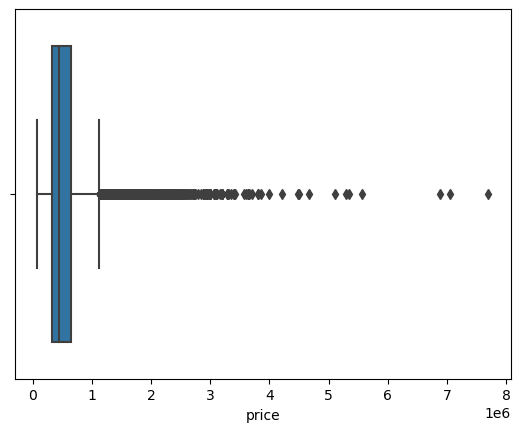

In [25]:
sns.boxplot (cleaned_df, x = 'price');

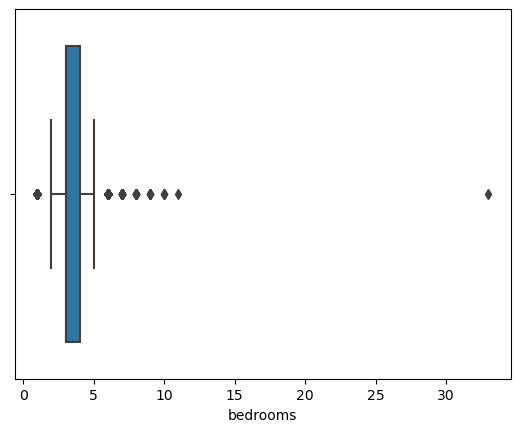

In [26]:
sns.boxplot(cleaned_df, x = 'bedrooms');

From the box plot above we see that bedrooms has an outlier of 33 bedrooms which will need to be dropped.

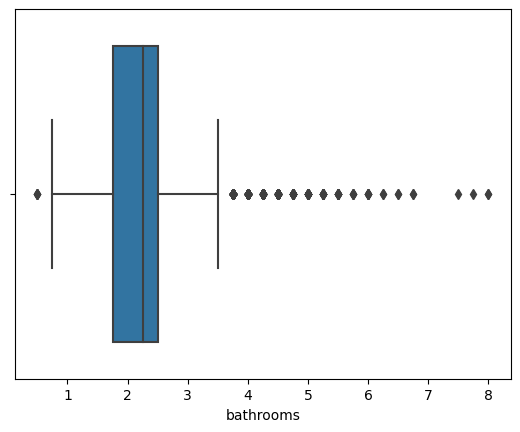

In [27]:
sns.boxplot(cleaned_df, x = 'bathrooms');

The plot above we see that there is no propery with 7 bathrooms but is not an outlier

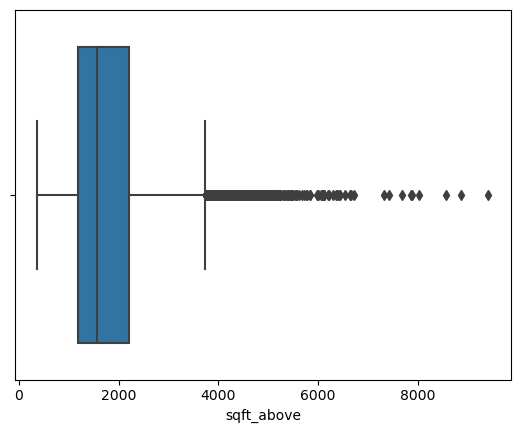

In [28]:
sns.boxplot(cleaned_df, x = 'sqft_above');

The plot above does not have outliers.

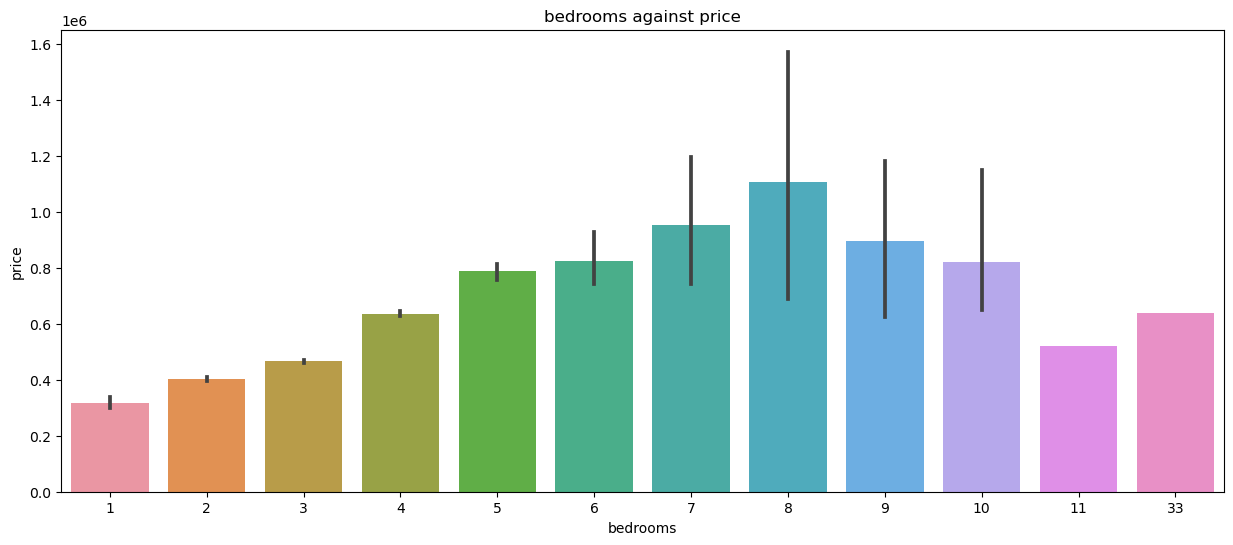

In [29]:
# plotting a barplot to visualize the bedroomsbefore it is removed as an outlier
# Distribution of bedrooms Against price 
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='bedrooms',y='price',data = cleaned_df)
ax.set_title("bedrooms against price");

 Before removing the outlier , we can see in the, distribution of bedrooms against price plot shows us, that there is a relationship between the price ans the bedroom. This means that the bedroom affects the pricing of the house. 

Removing outliers

In [30]:
cleaned_df.drop(cleaned_df[cleaned_df.bedrooms == 33].index , inplace= True)

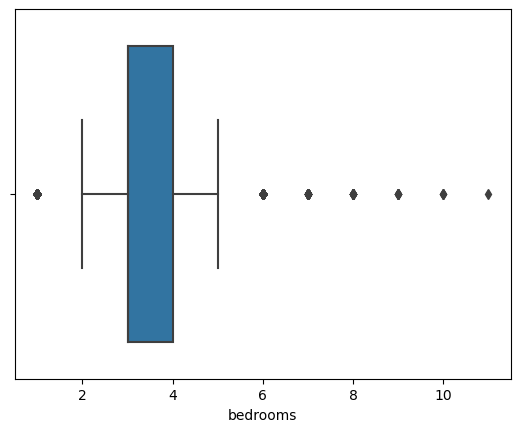

In [31]:
# confirming that the outlier has been removed
sns.boxplot(cleaned_df, x = 'bedrooms'); 

The boxplot above shows us that the outlier has been removed. 

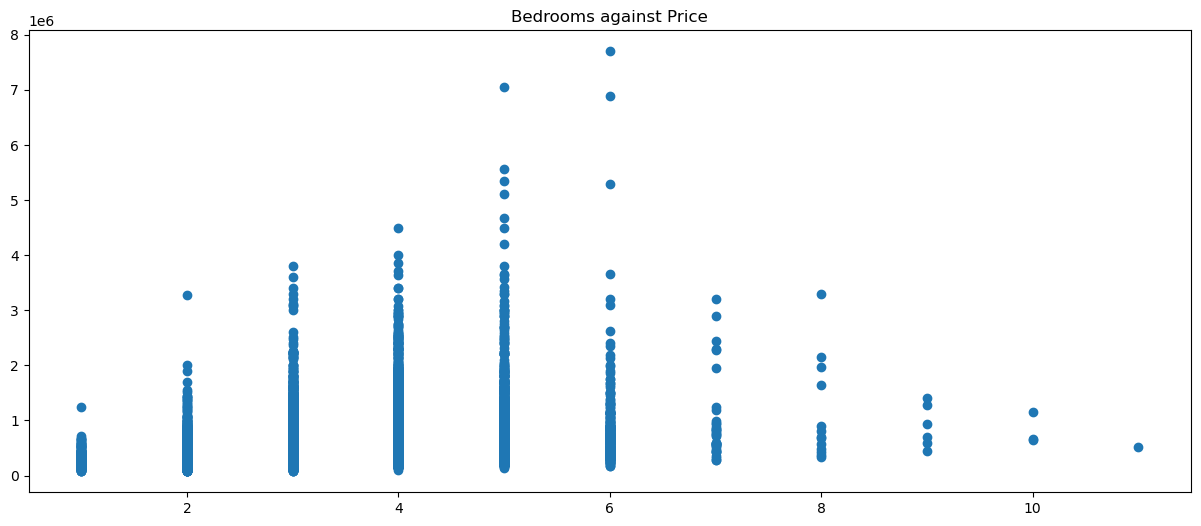

In [32]:
#Plotting distribution of the bedrooms and price Variables using matplotlib
plt.figure(figsize=(15,6)) #adjusting the width and height as desired 
plt.scatter(data = cleaned_df, x='bedrooms',y='price')
plt.title("Bedrooms against Price")
plt.show()

A scatter plot is used to show a relationship between two numeric variables and in this case we are plotting bedrooms against price 

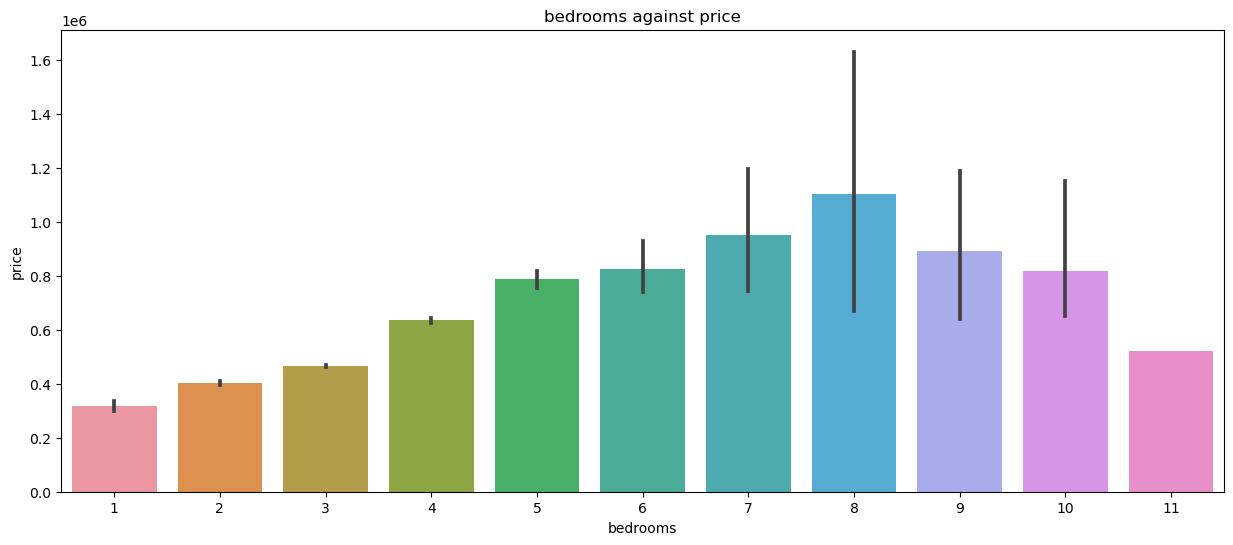

In [33]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='bedrooms',y='price',data = cleaned_df)
ax.set_title("bedrooms against price");

From the three plots above we can confirm that the outlier which was the 33 bedrooms has been removed or cleaned

EXPLORATORY DATA ANALYSIS (EDA)

COUNTPLOTS

Countplots  are used plotting for categorical variables that are in the dataset

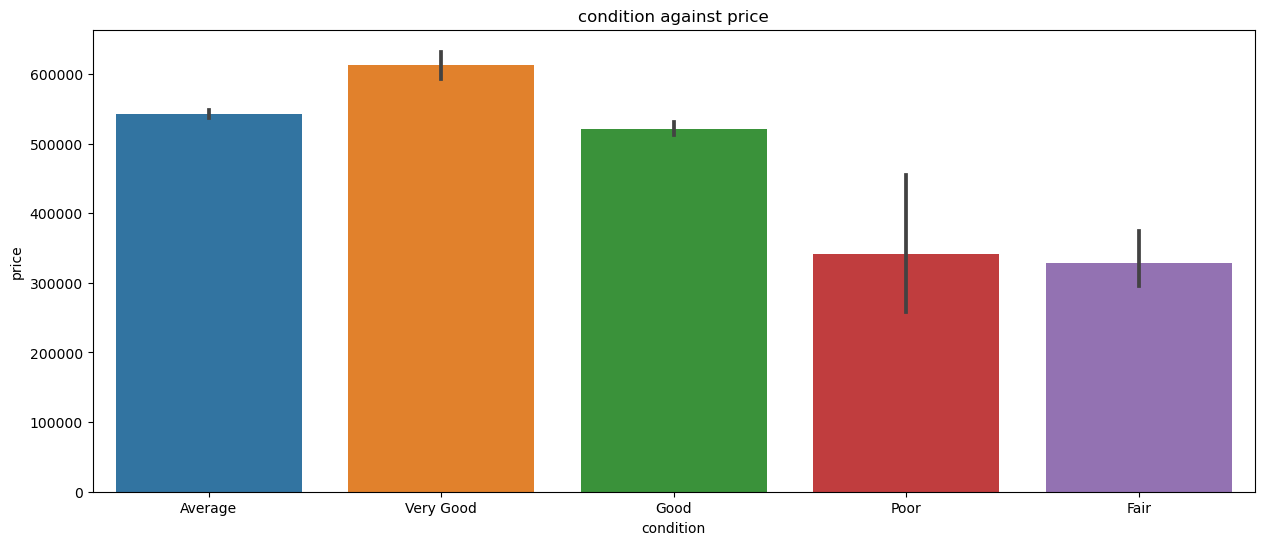

In [34]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='condition',y='price',data = cleaned_df)
ax.set_title("condition against price");

When it comes to the condition , most houses have been well maintained ans very few are in a poor condition.

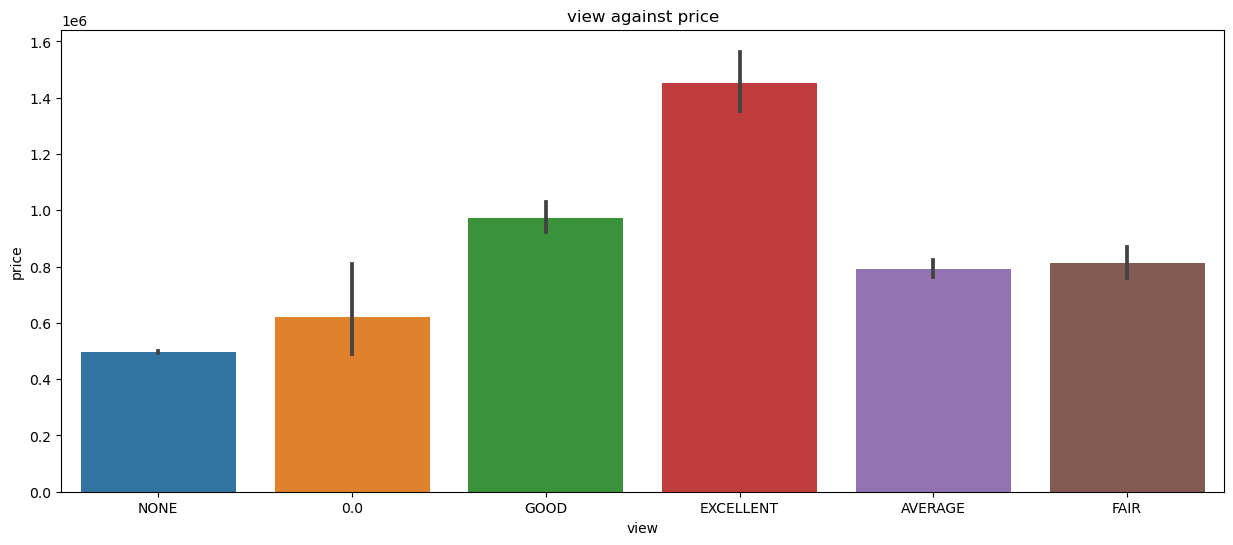

In [35]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='view',y='price',data = cleaned_df)
ax.set_title("view against price");

From the plot above we can see that most houses do not have a view which means the column view can be applicable for dropping

<Axes: xlabel='grade', ylabel='count'>

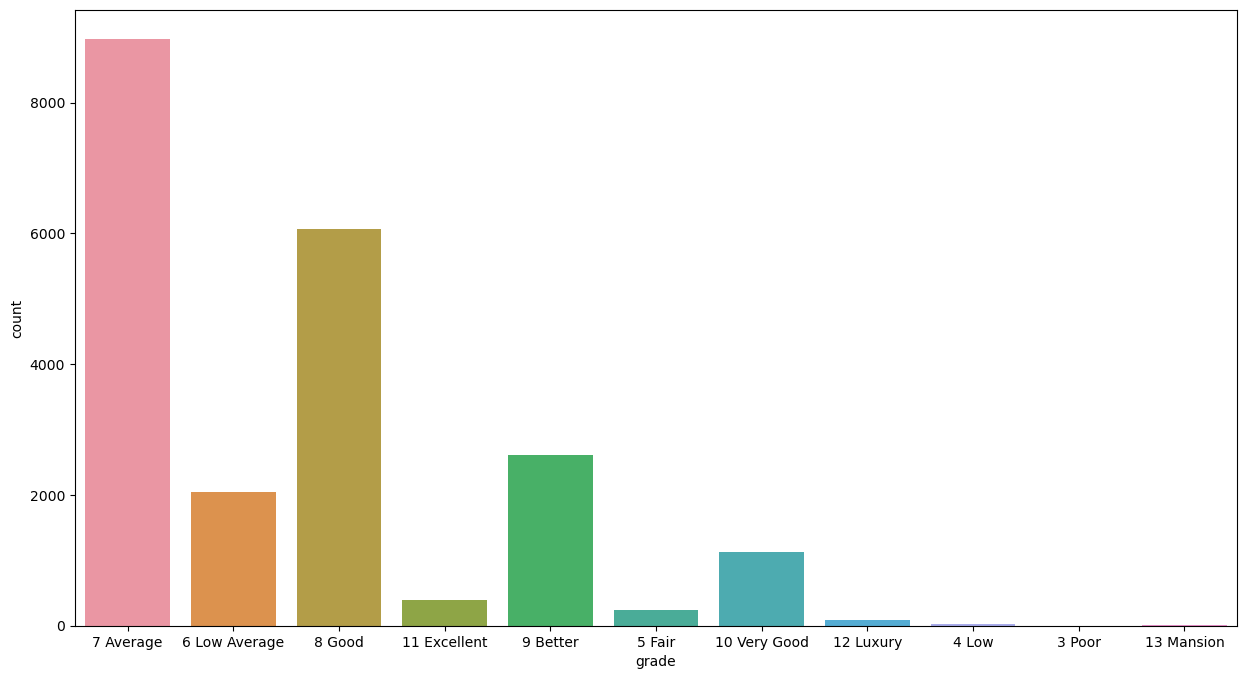

In [36]:
fig = plt.figure(figsize=(15,8))
sns.countplot(cleaned_df, x = 'grade')

We can see that most properties are average and good hence they are being purchased more.

Creating a new dataframe then looking for a correlation of the numeric variables

In [37]:
correlate =cleaned_df[['bedrooms','bathrooms','sqft_living','sqft_basement','sqft_lot15','sqft_living15','price']].copy()
correlate.corr()

,bedrooms,bathrooms,sqft_living,sqft_basement,sqft_lot15,sqft_living15,price
bedrooms,1.000000,0.527870,0.593178,0.303517,0.031892,0.404532,0.315961
bathrooms,0.527870,1.000000,0.755755,0.278504,0.088297,0.569878,0.525915
sqft_living,0.593178,0.755755,1.000000,0.428683,0.184337,0.756400,0.701929
sqft_basement,0.303517,0.278504,0.428683,1.000000,0.015894,0.199324,0.321103
sqft_lot15,0.031892,0.088297,0.184337,0.015894,1.000000,0.183506,0.082849
sqft_living15,0.404532,0.569878,0.756400,0.199324,0.183506,1.000000,0.585267
price,0.315961,0.525915,0.701929,0.321103,0.082849,0.585267,1.000000


The above table we can see the correlation of how each variable correlates with each value and we can see that other variables are highly correlated like the sqft_living and the bathroom while sqft_lot15 and the sqft_basementhave a low correlation of 0.016.

**Looking at the correlation between the variables and target variable individually**

Bedrooms

In [38]:
cleaned_df[['bedrooms', 'price']].corr()

,bedrooms,price
bedrooms,1.000000,0.315961
price,0.315961,1.000000


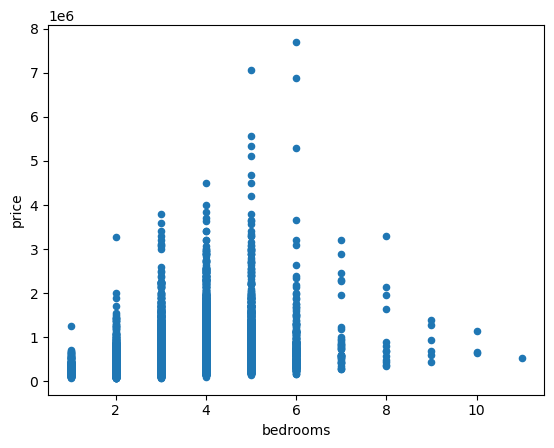

In [39]:
cleaned_df.plot.scatter(x="bedrooms", y="price");

We can see that there isn't a strong correlation between the bedrooms and the pricing, infact it is low which is shocking. From what we know the more the bedrooms the higher the price of the house.what can cause the price to be low can either be the condition of the rooms or the size of the rooms being small.

Sqft_living

In [40]:
cleaned_df[['sqft_living', 'price']].corr()

,sqft_living,price
sqft_living,1.000000,0.701929
price,0.701929,1.000000


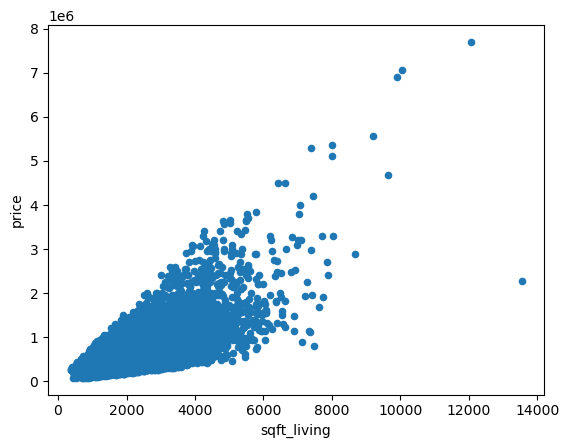

In [41]:
cleaned_df.plot.scatter(x="sqft_living", y="price");

The corrrelation between the sqft_living and pricing is highly correlated. Which means that most properties have ample living spaces and people seeem to like that and are buying/ renting the property. 

Bathrooms

In [42]:
cleaned_df[['bathrooms', 'price']].corr()

,bathrooms,price
bathrooms,1.000000,0.525915
price,0.525915,1.000000


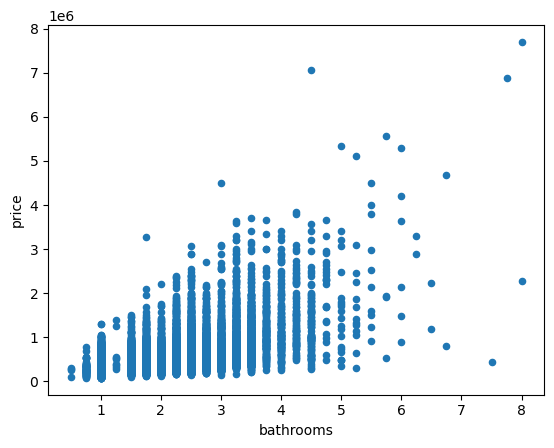

In [43]:
cleaned_df.plot.scatter(x="bathrooms", y="price");

The bathrooms and pricing are correlated and as we can seen emost properties have 2 to 3 bathrooms and looks like they are more wanted as there is less people sharing a bathroom.

Floors

In [44]:
cleaned_df[['floors', 'price']].corr()

,floors,price
floors,1.00000,0.25682
price,0.25682,1.00000


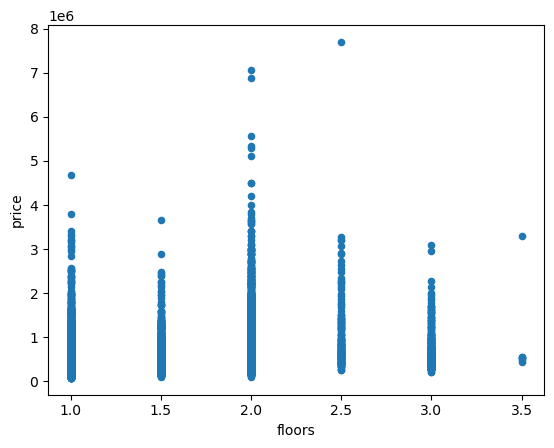

In [45]:
cleaned_df.plot.scatter(x="floors", y="price");

The floors and pricing have a low correlation which is understandable as most people dont mind how many floors they have to go as long as the property has met some if not all their needs they purchase / rent the property.

Sqft_lot15

In [46]:
cleaned_df[['sqft_lot15', 'price']].corr()

,sqft_lot15,price
sqft_lot15,1.000000,0.082849
price,0.082849,1.000000


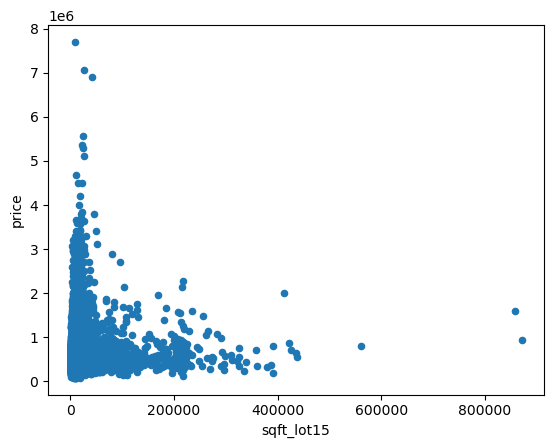

In [47]:
cleaned_df.plot.scatter(x="sqft_lot15", y="price");

The correlation between sqft_lot15 and pricing is really low. This means that its not a necessity that most people consider 

Sqft_basement

In [48]:
cleaned_df[['price', 'sqft_basement']].corr()

,price,sqft_basement
price,1.000000,0.321103
sqft_basement,0.321103,1.000000


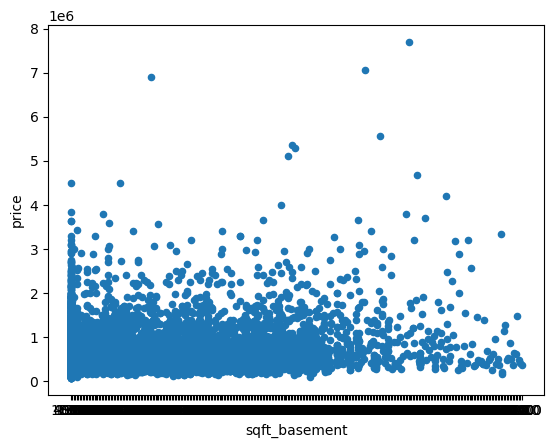

In [49]:
cleaned_df.plot.scatter(x="sqft_basement", y="price");

The sqft_basement and pricing have a very low correlation when its supposed to be high. This is because having a basement gives you some privacy unlike parking on the outside.From the correlational data it may be that most houses in that county are not being occupied or purchased hence they decided to lower the price. this may be a result of the basement being too small hence the pricing

**MODELLING AN OLS MODEL**

Ordinary Least Squares (OLS) is a regression technique that  provides a global model of the variable or process you are trying to understand or predict; it creates a table that has different values like the pvalue, the Adjacent R-squared and R squared.

In [50]:
# Defining the y and x_baseline that will be used in the model
y = cleaned_df["price"]
x_baseline = cleaned_df[["sqft_living"]]

In [51]:
# Using statsmodels and putting the x and y variables, so that it is well plotted into the model 
model = sm.OLS(y, sm.add_constant(x_baseline))
model

In [52]:
# Get model results
results= model.fit()

# Display results summary by using the .summary() method.
print (results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:13:11   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.401e+04   4410.123     -9.980      

Interpretation of the model

The model is statistically significant has a p-value that is lower than the standard alpha of 0.05.

The model explains a 49% of the variance in price. 

The model coefficients (const) is statistically significant, with t-statistic p-value that is below 0.05.

For each increase of 1 in the sqft_living, we see an associated increase in price of about 281.


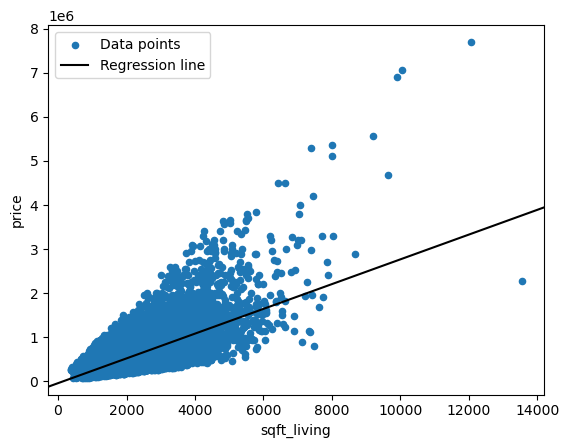

In [53]:
# Plotting a results model to show the regression line  
fig, ax = plt.subplots()
cleaned_df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results= results, label="Regression line", ax=ax, color="black")
ax.legend()

This shows how far our model goes from the best fit line which is in black. 

**MULTILINEAR REGRESSION**

In [54]:
y =cleaned_df['price']
x =cleaned_df[['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_lot15','sqft_living15']].copy()

In [55]:
modeled= sm.OLS(y, sm.add_constant(x))
modeled

In [56]:
# Get model results
results= modeled.fit()

# Display results summary by using the .summary() method.
print (results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     3863.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:13:11   Log-Likelihood:            -2.9950e+05
No. Observations:               21596   AIC:                         5.990e+05
Df Residuals:                   21589   BIC:                         5.991e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.849e+04   7874.605      4.887

Interpretation of the multilinear regression model

The model explains a 52%  of the variance in price

The (const, bedrooms, sqft_living, sqft_lot15, sqft_living) is statistically significant having a p-value that is lower than 0.05

Bathrooms and sqft_lot , we fail to reject the null hypothesis because our p-value is greater than 0.05 

From the model above we can see that, every 1 increase in sqft_living there is an increase of 281 price 

From the model we can see that, every 1 every increase in sqft_living15 there is an increase amount of 65 in pricing

From the model we can see  that, every increase in sqft_lot15 there is a decrease of 0.9 in price

In the model we can see that from every increase in bedrooms we can see a decrease of 5.9 in pricing


**Plotting a scatter matrix to show the correlation between the various predictors and the target variable**

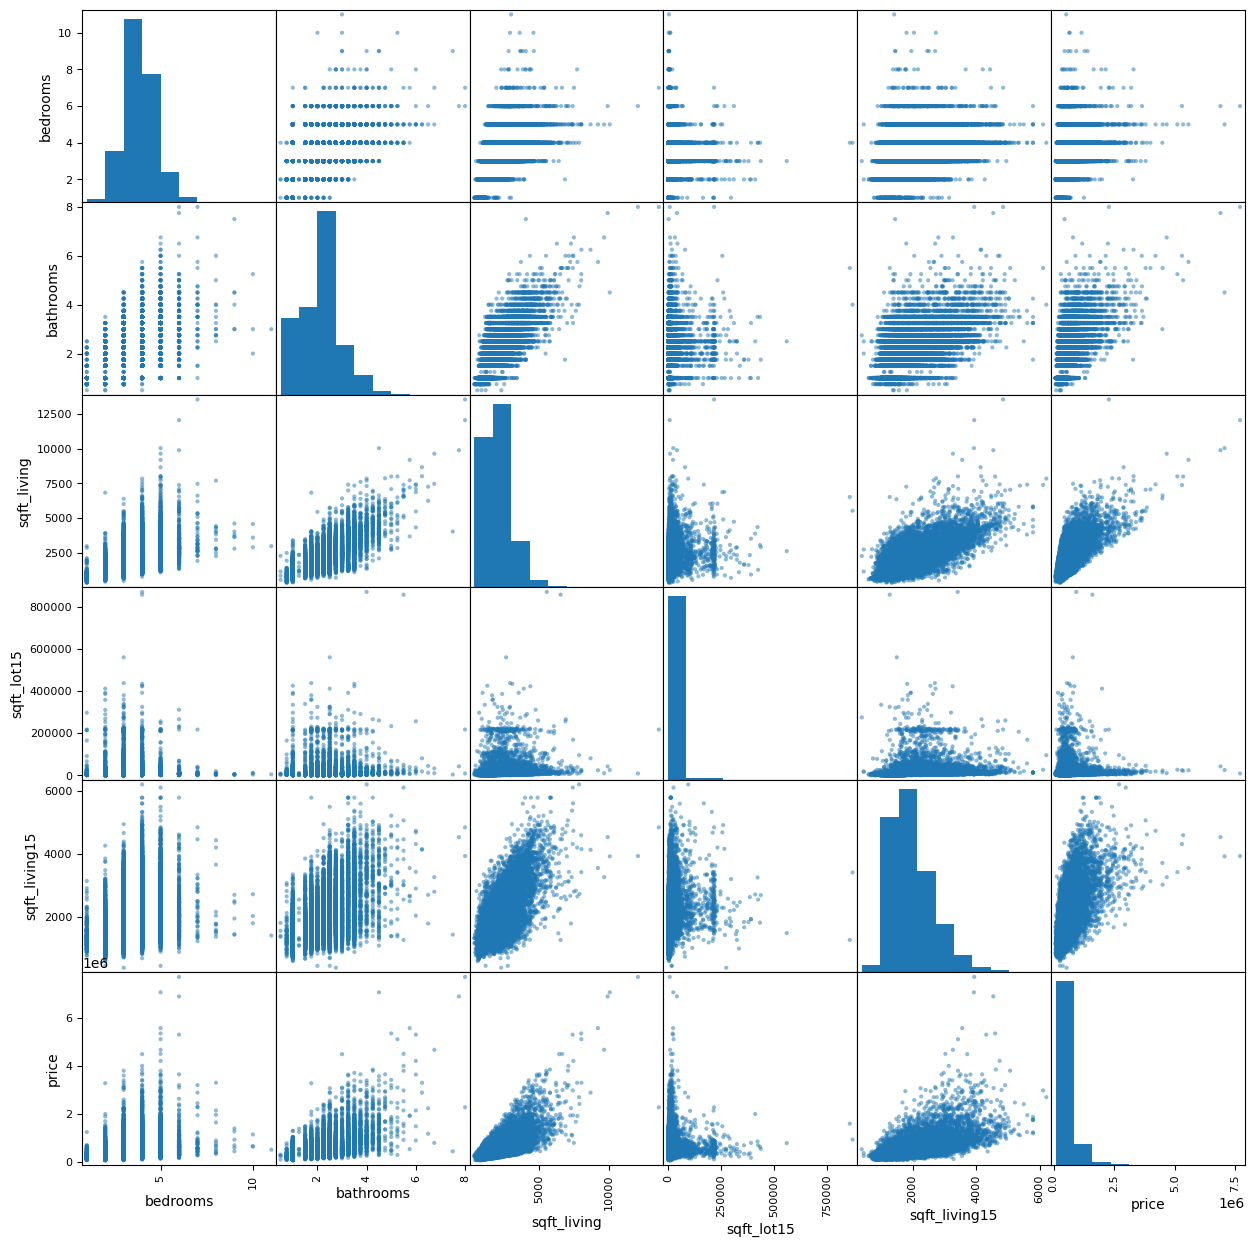

In [57]:
pd.plotting.scatter_matrix(correlate,figsize  = [15, 15]);
plt.show()

**Plotting a heat map to show that correlations between the target variable and the predictors**

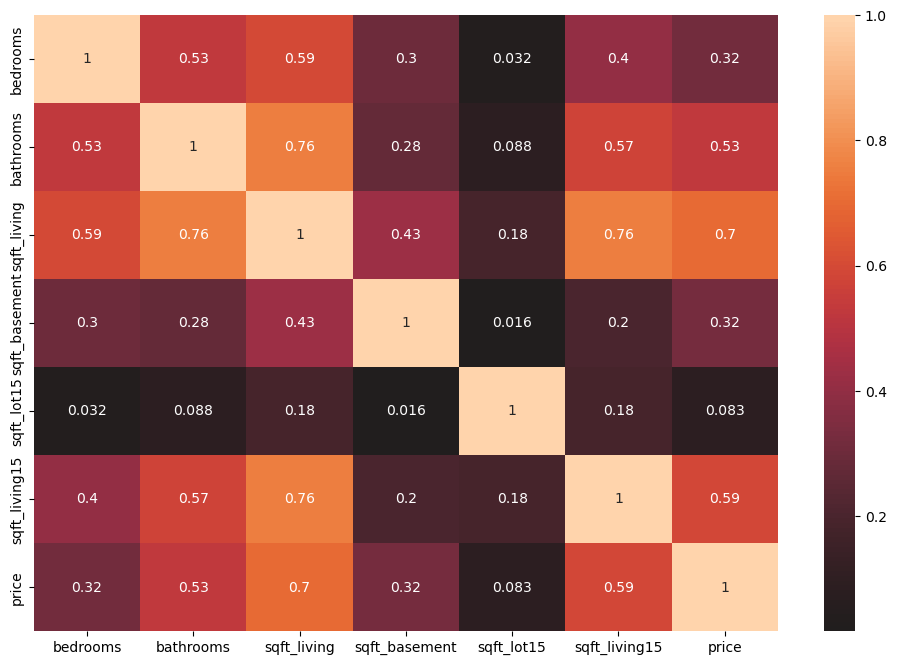

In [58]:
plt.figure (figsize= (12,8))
sns.heatmap(correlate.corr(), center=0, annot = True);

CONCLUSION


In the Kings county database I have made the following conclusions :-

1. The more the bedrooms the lower the pricing of the house

2. The condition of the house greatly affects the pricing to either go up or down 

3. The number of bathrooms in a property should be atleast/ if not match the number of bedrooms

4. The sqft_living is what has the highest correlaton with price

5. The property with sqft_basement had a low pricing which may have been due to its size being small.


RECOMMENDATION


1. ***The more the bedrooms the lower the pricing of the house*** -That the Kings county should build more of two to four bedrooms. This is because from the dataset observation, most people are going for those number of bedrooms which means it can increase the sales of the property and that of the county. They should also increase the size of the rooms instead of having many bedrooms which may be squeezed or small. You would rather have less room but with ample space if not spacious.

2. ***The condition of the house greatly affects the pricing to either go up or down*** - It is very important that the condition of the house is good because that will determine how much property you will sell. When the property is in good condition your can also increase the price by a certain percentage from what it was initially. 

3. ***The number of bathrooms in a property should be at least/ if not match the number of bedrooms*** -Bathrooms are an important necessity in a property hence, most people want a good number of bathrooms depending on the number of rooms that are in the property. That way there will be less congestion when it comes to the bathrooms area.

4. ***The sqft_living is what has the highest correlation with price*** - The bigger the sqft_living the more the pricing we have seen in Kings County. The  properties with more sqft have been purchased more which means they are also in good condition and that is how most properties should be.

5. ***The property with sqft_basement had low pricing which may have been due to its size being small*** - The basement is something that should be considered, this is because if the basement is in good condition and it is bigger it can have a good effect on the pricing which means it can be increased and you can also have more purchases of the property.